# Extracción de Caracteristicas

Usaremos el dataset generado anteriormente el cual no contiene nullos y se conforma por 413 filas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [3]:
#https://www.kaggle.com/zhangjuefei/birds-bones-and-living-habits
# Los esqueletos de este conjunto de datos son colecciones del Museo de Historia Natural del Condado de Los Ángeles.
#Pertenecen a 21 órdenes, 153 géneros, 245 especies.
file = "birds_without_nn.csv"
df=pd.read_csv(file)
# Cargamos el conjunto de datos en un dataframe
all_variables = df.columns.values.tolist()
features = all_variables[0:-1]
target = ['target']
df.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


In [4]:
#Estandarizamos las caracteristicas (media=0, varianza=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),columns=features)
df_sc.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,0.172937,0.331737,0.141992,0.352727,0.284873,0.258637,0.000000,0.311024,0.184955,0.236783
1,0.192759,0.328743,0.162879,0.417273,0.334569,0.314659,0.318635,0.358268,0.201698,0.249442
2,0.170962,0.313174,0.135250,0.389091,0.296845,0.277311,0.297868,0.312008,0.182623,0.199553
3,0.165305,0.273054,0.126670,0.342727,0.268054,0.241830,0.271514,0.249016,0.167494,0.204765
4,0.129099,0.221557,0.093158,0.248182,0.210186,0.167134,0.216503,0.205709,0.144173,0.183917


In [5]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),columns=features)
df_pca.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,-9.802630,-42.854425,-17.646899,0.081869,38.995924,4.755871,0.466297,-1.180130,-0.047736,-0.720576
1,30.174874,4.478626,4.962886,10.277529,3.151427,0.485272,0.847235,-0.326082,0.102577,-0.129844
2,14.241215,5.246874,6.675866,10.217514,3.172488,0.451729,1.210960,-0.415493,-0.076434,-0.109729
3,7.135148,1.020551,7.397162,9.533233,4.860053,0.310582,0.847083,0.102372,-0.067785,0.134262
4,-17.488905,-2.252885,6.031947,6.729271,6.117133,0.579085,0.344158,0.231510,-0.280834,-0.148494


In [6]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.97793360e-01, 7.96895837e-02, 1.20011417e-02, 7.07724992e-03,
       3.16493710e-03, 1.46473185e-04, 5.67630937e-05, 3.93523932e-05,
       2.45516783e-05, 6.58694749e-06])

In [10]:
#Importancia en procentaje de como afectan las variables
for i in explained_variance:
    print(i*100)

89.77933602955895
7.9689583650249265
1.2001141742852914
0.7077249917403473
0.316493709618802
0.014647318504233628
0.005676309371909087
0.003935239319999393
0.002455167826063701
0.0006586947494667065


In [8]:
df_pca['target'] = df['type']
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9','PC10','target']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,-9.802630,-42.854425,-17.646899,0.081869,38.995924,4.755871,0.466297,-1.180130,-0.047736,-0.720576,3
1,30.174874,4.478626,4.962886,10.277529,3.151427,0.485272,0.847235,-0.326082,0.102577,-0.129844,3
2,14.241215,5.246874,6.675866,10.217514,3.172488,0.451729,1.210960,-0.415493,-0.076434,-0.109729,3
3,7.135148,1.020551,7.397162,9.533233,4.860053,0.310582,0.847083,0.102372,-0.067785,0.134262,3
4,-17.488905,-2.252885,6.031947,6.729271,6.117133,0.579085,0.344158,0.231510,-0.280834,-0.148494,3


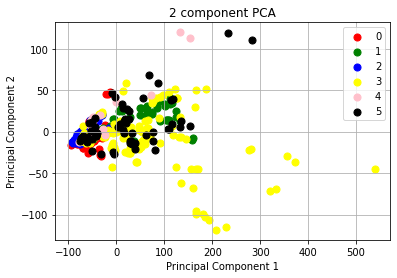

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [0,1,2,3,4,5]
colors = ['r', 'g', 'b','yellow','pink','black']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()